# K Nearest Neighbours

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00528/dataset.csv", header = 1, sep = ";")
df.head()

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1


In [3]:
# Usuwanie niepotrzebnych kolumn
df = df.drop(columns=['Green frogs', 'Brown frogs', 'Common toad', 'Common newt', 'Great crested newt', 'Tree frog'])

In [4]:
# Usuwanie danych kategorycznych
df = df.drop(columns=['ID', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR', 'RR', 'BR','MR', 'CR'])
df.head()

,Motorway,SR,NR,OR,Fire-bellied toad
0,A1,600,1,50,0
1,A1,700,1,75,0
2,A1,200,1,75,0
3,A1,300,1,25,0
4,A1,600,2,99,1


In [5]:
# Proporcje dla Kumaka nizinnego
df['Fire-bellied toad'].value_counts()

Fire-bellied toad
0    131
1     58
Name: count, dtype: int64

[None]

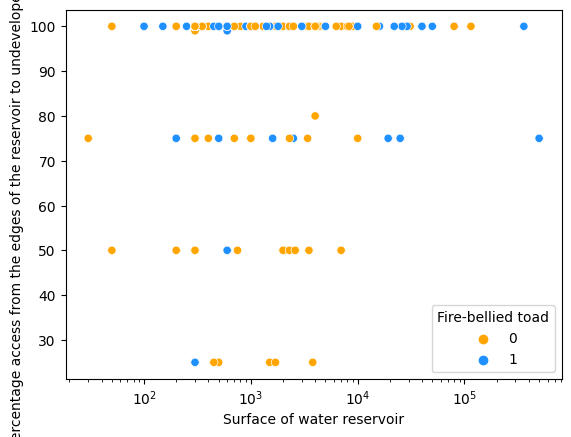

In [6]:
# Scatterplot - nie jest zbyt pomocny
p =sns.scatterplot(x="SR", y="OR", hue="Fire-bellied toad",
              data=df,palette=['orange','dodgerblue'], legend='full')
plt.xlabel('Surface of water reservoir')
plt.ylabel('Percentage access from the edges of the reservoir to undeveloped areas')
p.set(xscale="log")

[None]

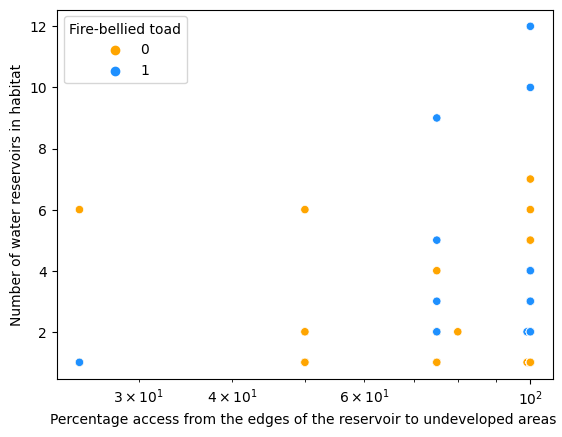

In [7]:
#Scatterplot 2 - również nie jest pomocny

p =sns.scatterplot(x="OR", y="NR", hue="Fire-bellied toad",
              data=df,palette=['orange','dodgerblue'], legend='full')
plt.xlabel('Percentage access from the edges of the reservoir to undeveloped areas ')
plt.ylabel('Number of water reservoirs in habitat')
p.set(xscale="log")

[None]

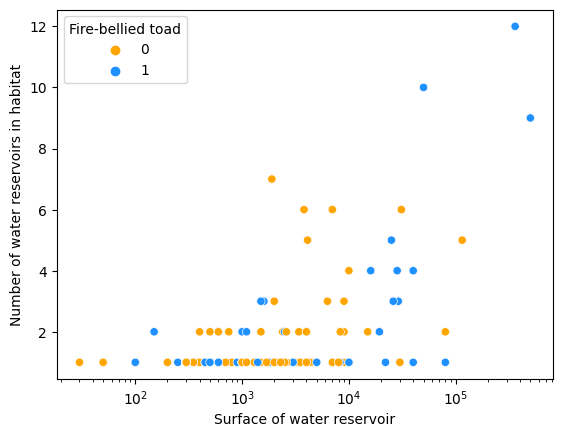

In [8]:
#Scatterplot 3 - bardziej pomocny bo widzimy jakieś grupowanie

p =sns.scatterplot(x="SR", y="NR", hue="Fire-bellied toad",
              data=df,palette=['orange','dodgerblue'], legend='full')
plt.xlabel('Surface of water reservoir')
plt.ylabel('Number of water reservoirs in habitat')
p.set(xscale="log")

In [9]:
# Podział danych i trenowanie
X = df.iloc[:, 1:-1]
y = df.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40)

In [10]:
# Skalowanie danych
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Ustawiamy najbliższych sąsiadów na 3
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0]


In [13]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[49  4]
 [18  5]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.82        53
           1       0.56      0.22      0.31        23

    accuracy                           0.71        76
   macro avg       0.64      0.57      0.56        76
weighted avg       0.68      0.71      0.66        76



Text(0, 0.5, 'Error rate')

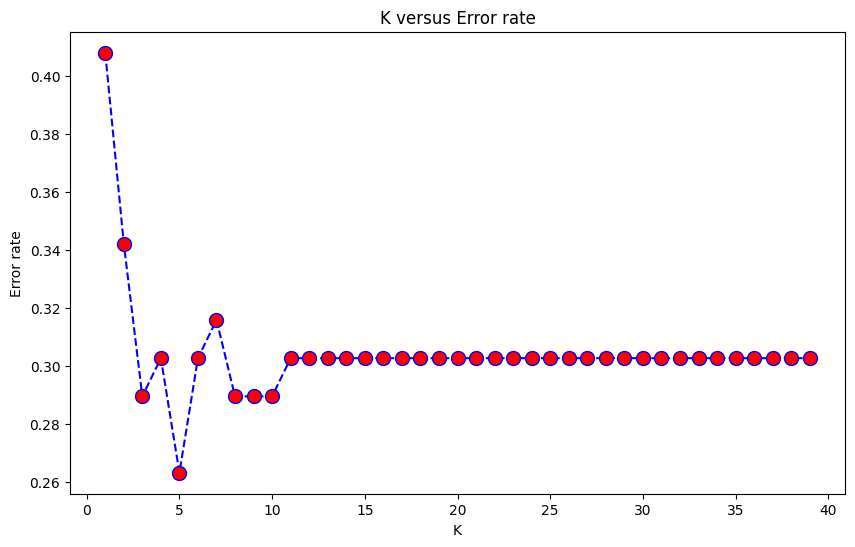

In [14]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
   
plt.figure(figsize=(10, 6))

plt.plot(range(1, 40), error_rate, color='blue', linestyle='--',
         markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel('Error rate')

In [15]:
# Tworzymy nowe dane treningowe aby spróbować nowego klasyfikatora
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.40)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.40)

scaler = StandardScaler()
scaler.fit(X_train2)
scaler.fit(X_train3)

X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)

X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)

In [16]:
# Tworzenie nowego KNN dla 17 neighbors
classifier2 = KNeighborsClassifier(n_neighbors = 17)

In [17]:
classifier2.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=17)

In [18]:
y_pred2 = classifier2.predict(X_test2)

In [19]:
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[47  8]
 [17  4]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        55
           1       0.33      0.19      0.24        21

    accuracy                           0.67        76
   macro avg       0.53      0.52      0.52        76
weighted avg       0.62      0.67      0.64        76

